In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

# import stuff

# try:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import neurolib.utils.functions as func
from neurolib.utils.stimulus import OrnsteinUhlenbeckProcess


from neurolib.models.multimodel import WilsonCowanNetwork, WilsonCowanNode, MultiModel

# except ImportError:
#     import sys
#     !{sys.executable} -m pip install matplotlib
#     import matplotlib.pyplot as plt

In [2]:
from neurolib.utils.loadData import Dataset

ds = Dataset("gw", fcd = True)

In [3]:
def loadMat():
    Cmatrix = []
    Dmatrix = []
    Fmatrix = []
    Tmatrix = []
    FC_LR = []
    FC_RL = []
    TC_LR = []
    TC_RL = []

    dataDir = "/Users/pamirozsuna/Desktop/Masterarbeit/pamir_master_thesis/"

    subjectsFC = sorted(glob.glob(dataDir + "FC/1_AAL/*")) # reading the file names using glob
    subjectsSC = sorted(glob.glob(dataDir + "SC/1_AAL/*"))
    for subjectSC in subjectsSC:
	    for subjectFC in subjectsFC:
	    	# take subjects only if they have all SC, LR_FC and RL_FC matrices
	    	if(subjectSC[-6:]==subjectFC[-6:] and os.path.isfile(subjectFC + '/rfMRI_REST1_LR/FC.mat')  and os.path.isfile(subjectFC + '/rfMRI_REST1_RL/FC.mat')):
	    		this_cm = loadmat(subjectSC + "/DTI_CM.mat")['SC']
	    		Cmatrix.append(this_cm)
	    		this_dc = loadmat(subjectSC + "/DTI_LEN.mat")['LEN']
	    		Dmatrix.append(this_dc)
	    		FC_LR = loadmat(subjectFC + '/rfMRI_REST1_LR/FC.mat')["fc"]
	    		TC_LR = loadmat(subjectFC + '/rfMRI_REST1_LR/TC.mat')["tc"]
	    		FC_RL = loadmat(subjectFC + '/rfMRI_REST1_RL/FC.mat')["fc"]
	    		TC_RL = loadmat(subjectFC + '/rfMRI_REST1_RL/TC.mat')["tc"]
	    		Fmatrix.append(filterSubcortical(np.mean( np.array([FC_LR, FC_RL]), axis=0)))
	    		Tmatrix.append(filterSubcortical(np.mean( np.array([TC_LR[:,0:355], TC_RL[:,0:355]]), axis=0), axis=0))
        
    return Cmatrix,Dmatrix,Tmatrix,Fmatrix

In [4]:
def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat

def ComputeAverageMats(Cmatrix, Dmatrix):
    Cmat = averageMat(Cmatrix)
    Dmat = averageMat(Dmatrix)
    return Cmat, Dmat


In [5]:
import glob
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

ds = Dataset(datasetName = 'gw', normalizeCmats = None)
dataDict_sc, dataDict_len, dataDict_ts, dataDict_fc = loadMat()

GW_FC_mean = np.mean(ds.FCs, axis=0) # Average FC GW
ds.FCs = []
ds.FCs.append(GW_FC_mean)
ds.FCs.append(np.mean(dataDict_fc, axis=0)) # Add average FC HCP
print("ds FCs shape: " + str(np.shape(ds.FCs)))

print(np.shape(dataDict_ts))
GW_BOLD_mean = np.mean(ds.BOLDs, axis = 0)
print(np.shape(GW_BOLD_mean))
ds.BOLDs = []
ds.BOLDs.append(GW_BOLD_mean)
ds.BOLDs.append(np.mean(dataDict_ts, axis=0))
print("ds BOLDs length: " + str(len(ds.BOLDs)))

ds.Cmat, ds.Dmat = ComputeAverageMats(dataDict_sc, dataDict_len)
ds.Cmat = filterSubcortical(ds.Cmat)
ds.Cmats = dataDict_sc
ds.data = []
ds.Dmat = filterSubcortical(ds.Dmat)
ds.Dmats = dataDict_len
ds.dsBaseDirectory = '../Data/'

ds FCs shape: (2, 80, 80)
(143, 80, 355)
(80, 355)
ds BOLDs length: 2


In [6]:
#load data
BOLD_signal = np.load("/Users/pamirozsuna/Desktop/pamir_ma/results/MultiModel/WCMultiModel400000.1SimulationResultsBOLD.npy")
BOLD_t = np.load("/Users/pamirozsuna/Desktop/pamir_ma/results/MultiModel/WCMultiModel400000.1SimulationResultsBOLD.t_BOLD.npy")
t = np.load("/Users/pamirozsuna/Desktop/pamir_ma/results/MultiModel/WCMultiModel400000.1SimulationResultst.npy")
q_mean_EXC = np.load("/Users/pamirozsuna/Desktop/pamir_ma/results/MultiModel/WCMultiModel400000.1SimulationResultsq_mean_EXC.npy")

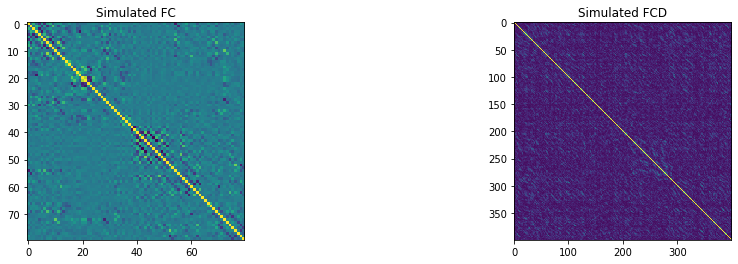

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].set_title("Simulated FC")
axs[0].imshow(func.fc(q_mean_EXC[:,:]))
axs[1].set_title("Simulated FCD")
axs[1].imshow(func.fcd(q_mean_EXC, stepsize=100))
#axs[2].set_title("Mean Power Spectrum")
#fr, pw = func.getMeanPowerSpectrum(wc_net.q_mean_EXC, wc_net.params["dt"])
#axs[2].plot(fr, pw, c='k', lw = 2)
#plt_name = "WCMultiModel"+str(wc_net.params["duration"])+str(wc_net.params["dt"])+"SimulationResults"
#plt.savefig(plt_name+".png", dpi=500)